In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True) # Mounting google drive as the data and folder structure is stored on the drive 

Mounted at /content/gdrive


In [ ]:
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 38.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 22.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 24.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.2 MB/s 
  Created wheel for cairocffi: filename=cairo

In [ ]:
import warnings                   
warnings.filterwarnings("ignore") 

#### Importing packages

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ts2vg import NaturalVG
from ts2vg import HorizontalVG

In [ ]:
# writing a function to generate metrics such as avg_deg,network_dia,avg_path_length
def gen_metrics(ts,method):
    if method == "NVG":               # Checking if the method is NVG,HVG
        graph_method = NaturalVG()
    if method == "HVG":
        graph_method = HorizontalVG() 
    graph_method.build(time_series)         # fitting the method to the time series
    graph_method1 = graph_method.as_igraph()
    avg_deg = np.mean(graph_method1.degree())     #calculating average degree
    network_dia = graph_method1.diameter()        # calculating network diameter
    avg_path_len = graph_method1.average_path_length() # calculating average path length
    nodes = graph_method1.vcount()                     # Calculating number of nodes
    links = graph_method1.ecount()                     # Calculating links
    
    return nodes,links,avg_deg,network_dia,avg_path_len
    

In [ ]:
data_path='/content/gdrive/MyDrive/Data'

In [ ]:
folder_list = os.listdir(data_path) # listing the files in the folder

In [ ]:
folder_list

['Sub_14',
 'Sub_2',
 'Sub_9',
 'Sub_5',
 'Sub_7',
 'Sub_15',
 'Sub_4',
 'Sub_6',
 'Sub_8',
 'Sub_3',
 'Sub_11',
 'Sub_1',
 'Sub_13',
 'Sub_12',
 'Sub_10']

#### The code below reads the files from the folder and appends it to a dataframe, the columns Subject,Activity and Sensor Location are derived from the file names in the folder structure shown below 


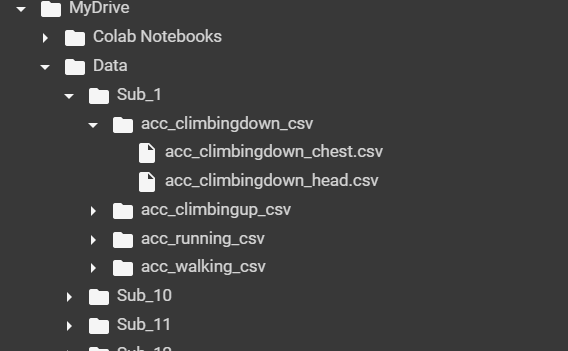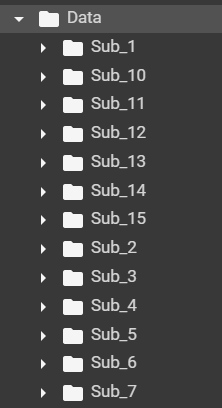




In [ ]:
temp = pd.DataFrame()                                  # Creating a temporary dataframe to read the files
appended_data = []
count = 1
for i in folder_list: # iterating through each of the Subjects
  act_list = os.listdir(data_path+'/'+i)  # listing each sub folders 
  for j in act_list:
    data_list = os.listdir(data_path+'/'+i+'/'+j) # iterating through the subfolders
    for k in data_list:                          # iterating through the files
      temp = pd.read_csv(data_path+'/'+i+'/'+j+'/'+k)
      temp = temp.iloc[999:2024,:]                    # Subsetting the data from 1000 to 2024 time series
      temp1 = pd.melt(temp, id_vars =['id'], value_vars =['attr_x','attr_y','attr_z'])    #melting the dataframe to have the time series data in horizontal f
      temp2 = temp1.pivot(columns=['id'],values=['value'],index='variable').reset_index()
      temp2.columns = temp2.columns.droplevel(0)
      temp2 = temp2.rename(columns={'':'axis'})
      temp2['Subject'] = i                   # assigning the subject column with values
      temp2['activity'] = j.split('_')[1]    # splitting the sub folder to retrieve activity
      temp2['sensor_location'] = k.split('_')[2].replace('.csv','') # remove the ".csv" and assigning the sensor location
      appended_data.append(temp2)
df_final = pd.concat(appended_data,ignore_index=True)

In [ ]:
df_final.to_csv('prep_data_ts.csv',index=False) #writing the file to a csv

In [ ]:
df_final = pd.read_csv('prep_data_ts.csv') # reading the file

In [ ]:
col_list = list(np.arange(1000,2025))     # generating the list of column names
str_col_list = [str(x) for x in col_list] # converting the column names to str to subset

In [ ]:
df_final.head()

,axis,1000,1001,1002,1003,1004,1005,1006,1007,1008,...,2018,2019,2020,2021,2022,2023,2024,Subject,activity,sensor_location
0,attr_x,4.472369,5.722142,6.258443,6.345831,6.412870,6.301539,5.415086,4.893748,4.589086,...,16.233286,19.607914,18.370111,15.509040,12.959814,11.237784,10.274716,Sub_1,climbingdown,chest
1,attr_y,3.019687,4.464588,6.097433,7.076063,7.289746,6.783970,6.014833,5.601235,5.665878,...,7.139510,6.816292,5.093664,3.554192,3.369839,3.632004,4.110844,Sub_1,climbingdown,chest
2,attr_z,1.057639,0.661997,1.148618,1.823185,1.948880,1.407192,0.969652,1.169568,1.684321,...,3.067571,2.952649,1.068412,2.528876,2.299032,4.566341,5.470751,Sub_1,climbingdown,chest
3,attr_x,1.025317,1.397615,1.334768,1.192313,1.209072,1.295862,1.417367,0.111929,-1.787870,...,-0.241216,-0.455497,-0.544681,-0.581192,-0.779313,-0.955885,-1.066617,Sub_1,climbingdown,head
4,attr_y,9.160215,9.095572,9.330803,9.157822,8.800487,8.219893,7.694964,9.357139,12.776059,...,8.349778,7.797915,7.286154,7.073669,7.125743,6.965930,6.461352,Sub_1,climbingdown,head


In [ ]:
df_graph = pd.DataFrame(np.repeat(df_final.values, 2, axis=0)) # repeating the rows
df_graph.columns = df_final.columns

In [ ]:
df_graph.head()

,axis,1000,1001,1002,1003,1004,1005,1006,1007,1008,...,2018,2019,2020,2021,2022,2023,2024,Subject,activity,sensor_location
0,attr_x,4.47237,5.72214,6.25844,6.34583,6.41287,6.30154,5.41509,4.89375,4.58909,...,16.2333,19.6079,18.3701,15.509,12.9598,11.2378,10.2747,Sub_1,climbingdown,chest
1,attr_x,4.47237,5.72214,6.25844,6.34583,6.41287,6.30154,5.41509,4.89375,4.58909,...,16.2333,19.6079,18.3701,15.509,12.9598,11.2378,10.2747,Sub_1,climbingdown,chest
2,attr_y,3.01969,4.46459,6.09743,7.07606,7.28975,6.78397,6.01483,5.60123,5.66588,...,7.13951,6.81629,5.09366,3.55419,3.36984,3.632,4.11084,Sub_1,climbingdown,chest
3,attr_y,3.01969,4.46459,6.09743,7.07606,7.28975,6.78397,6.01483,5.60123,5.66588,...,7.13951,6.81629,5.09366,3.55419,3.36984,3.632,4.11084,Sub_1,climbingdown,chest
4,attr_z,1.05764,0.661997,1.14862,1.82318,1.94888,1.40719,0.969652,1.16957,1.68432,...,3.06757,2.95265,1.06841,2.52888,2.29903,4.56634,5.47075,Sub_1,climbingdown,chest


In [ ]:
df_graph['Method'] = np.where(df_graph.index%2==0, 'HVG', 'NVG') # Assigning each  alternate row with HVG and NVG methods

In [ ]:
df_graph.head()

,axis,1000,1001,1002,1003,1004,1005,1006,1007,1008,...,2019,2020,2021,2022,2023,2024,Subject,activity,sensor_location,Method
0,attr_x,4.47237,5.72214,6.25844,6.34583,6.41287,6.30154,5.41509,4.89375,4.58909,...,19.6079,18.3701,15.509,12.9598,11.2378,10.2747,Sub_1,climbingdown,chest,HVG
1,attr_x,4.47237,5.72214,6.25844,6.34583,6.41287,6.30154,5.41509,4.89375,4.58909,...,19.6079,18.3701,15.509,12.9598,11.2378,10.2747,Sub_1,climbingdown,chest,NVG
2,attr_y,3.01969,4.46459,6.09743,7.07606,7.28975,6.78397,6.01483,5.60123,5.66588,...,6.81629,5.09366,3.55419,3.36984,3.632,4.11084,Sub_1,climbingdown,chest,HVG
3,attr_y,3.01969,4.46459,6.09743,7.07606,7.28975,6.78397,6.01483,5.60123,5.66588,...,6.81629,5.09366,3.55419,3.36984,3.632,4.11084,Sub_1,climbingdown,chest,NVG
4,attr_z,1.05764,0.661997,1.14862,1.82318,1.94888,1.40719,0.969652,1.16957,1.68432,...,2.95265,1.06841,2.52888,2.29903,4.56634,5.47075,Sub_1,climbingdown,chest,HVG


#### Generating empty columns for all the metrics

In [ ]:
df_graph['nodes'] = ''
df_graph['links'] = ''
df_graph['average_degree'] = ''
df_graph['network_diameter'] = ''
df_graph['average_path_length'] = ''

In [ ]:
df_graph = df_graph.reset_index(drop=True)

In [ ]:
for index,row in df_graph.iterrows():    # generating row object using iterrow to iterate over each row in the dataframe
    if(row['Method'] == 'NVG'):       # Checking the method required to calcualte metrics
        time_series = row[str_col_list]   # subsetting the values for time series using previously generated column list     
        nodes,links,avg_deg,network_dia,avg_path_len=gen_metrics(time_series,row['Method']) # generating the metrics
        
        row['nodes'] = nodes      #assigning the calculated nodes to each row 
        row['links'] = links      #assigning the calculated links to each row
        row['average_degree'] = avg_deg #assigning the calculated average degree to each row
        row['network_diameter'] = network_dia #assigning the calculated network dia to each row
        row['average_path_length'] = avg_path_len #assigning the calculated average path length to each row
        
    if(row['Method'] == 'HVG'):                       # Checking the method required to calcualte metrics
        time_series = row[str_col_list]               # subsetting the values for time series using previously generated column list  
        nodes,links,avg_deg,network_dia,avg_path_len=gen_metrics(time_series,row['Method'])
        
        row['nodes'] = nodes                          #assigning the calculated nodes to each row
        row['links'] = links                          #assigning the calculated links to each row
        row['average_degree'] = avg_deg
        row['network_diameter'] = network_dia
        row['average_path_length'] = avg_path_len
    

In [ ]:
df_plot = df_graph.drop(str_col_list,axis=1) # dropping the time series columns

In [ ]:
df_plot.shape

(720, 10)

In [ ]:
df_all_metric=df_plot.copy()

In [ ]:
df_plot.drop(['nodes','links'],axis=1,inplace=True)

### The Output Table for the sensor location, metrics calculated, axis

In [ ]:
df_plot.head()

,axis,Subject,activity,sensor_location,Method,average_degree,network_diameter,average_path_length
0,attr_x,Sub_1,climbingdown,chest,HVG,3.94927,32,14.5141
1,attr_x,Sub_1,climbingdown,chest,NVG,15.5961,16,6.59939
2,attr_y,Sub_1,climbingdown,chest,HVG,3.94537,29,12.5341
3,attr_y,Sub_1,climbingdown,chest,NVG,14.078,10,4.26774
4,attr_z,Sub_1,climbingdown,chest,HVG,3.96878,23,9.95898


### Creating dataframes for plot and creating plots

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_1 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['walking','running']))]
plot_2 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['walking','running']))]

In [ ]:
plot_1.head()

,axis,Subject,activity,sensor_location,Method,nodes,links,average_degree,network_diameter,average_path_length
25,attr_x,Sub_1,running,chest,NVG,1025,4309,8.4078,9,4.31193
37,attr_x,Sub_1,walking,chest,NVG,1025,5873,11.4595,10,4.4416
73,attr_x,Sub_10,running,chest,NVG,1025,4173,8.14244,13,5.01418
85,attr_x,Sub_10,walking,chest,NVG,1025,4884,9.52976,11,4.46069
121,attr_x,Sub_11,running,chest,NVG,1025,4777,9.32098,9,4.72972


Text(0, 0.5, 'network_diameter')

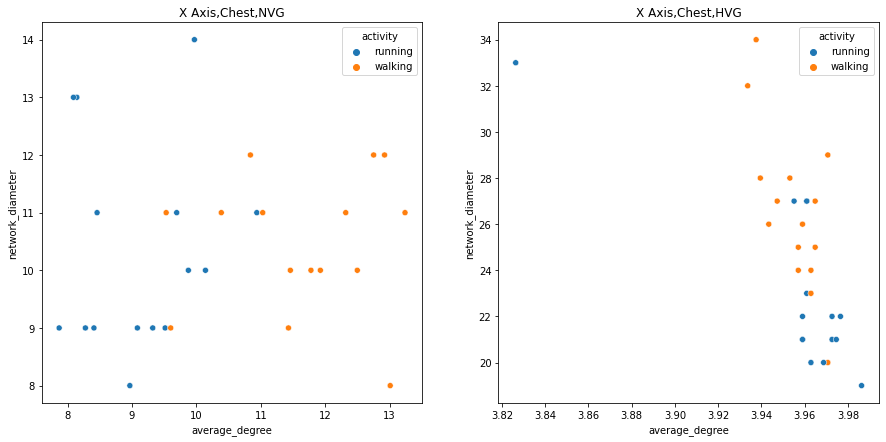

In [ ]:
plt.figure(figsize=(15,7)) # Setting the figure plot size
plt.subplot(1,2,1)         # setting the subplot
sns.scatterplot('average_degree','network_diameter',data=plot_1,hue='activity') # generating the scatterplot
plt.title("X Axis,Chest,NVG") # setting the title
plt.xlabel("average_degree")  # setting the xlabel
plt.ylabel("network_diameter") # setting the y label

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_2,hue='activity') # generating the scatterplot
plt.title("X Axis,Chest,HVG") # setting the title
plt.xlabel("average_degree") # setting the xlabel
plt.ylabel("network_diameter") # setting the y label

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_3 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['walking','running']))]
plot_4 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['walking','running']))]

Text(0, 0.5, 'network_diameter')

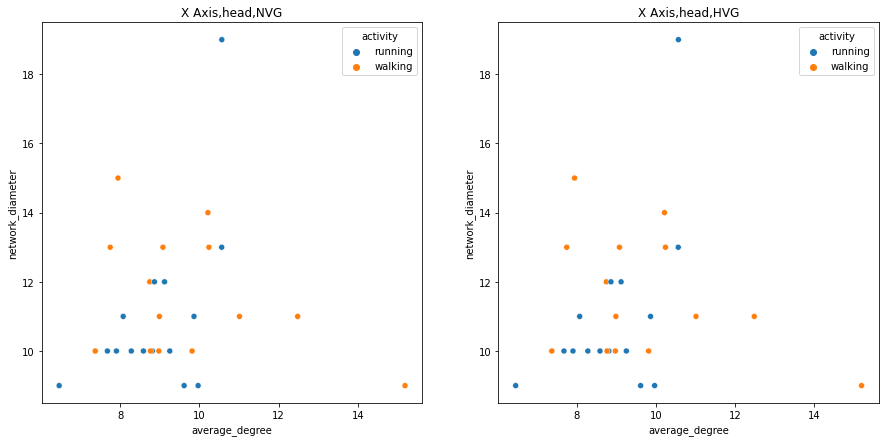

In [ ]:
plt.figure(figsize=(15,7)) # Setting the figure plot size
plt.subplot(1,2,1)         # setting the subplot
sns.scatterplot('average_degree','network_diameter',data=plot_3,hue='activity') # generating the scatterplot
plt.title("X Axis,head,NVG") # setting the title
plt.xlabel("average_degree") # setting the xlabel
plt.ylabel("network_diameter") # setting the y label

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_3,hue='activity')
plt.title("X Axis,head,HVG") # setting the title
plt.xlabel("average_degree") # setting the xlabel
plt.ylabel("network_diameter") # setting the ylabel

In [ ]:
plot_5 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['walking','running']))]
plot_6 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['walking','running']))]

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

Text(0, 0.5, 'network_diameter')

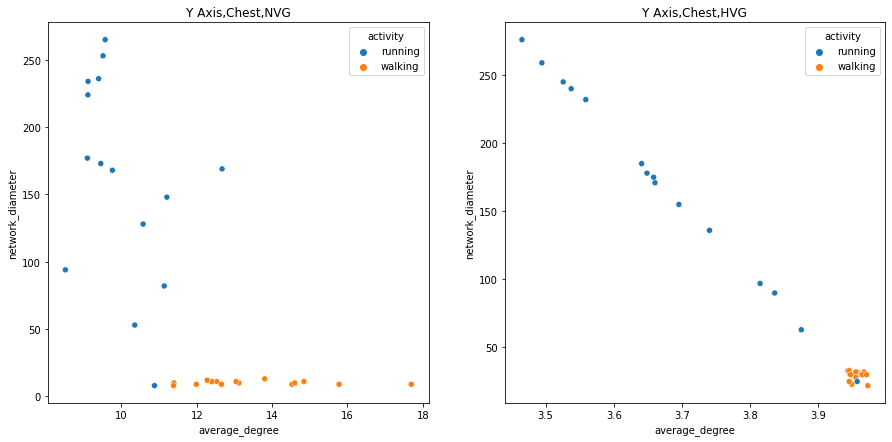

In [ ]:
plt.figure(figsize=(15,7)) # Setting the figure plot size
plt.subplot(1,2,1) # setting the subplot
sns.scatterplot('average_degree','network_diameter',data=plot_5,hue='activity') # generating the scatterplot
plt.title("Y Axis,Chest,NVG")  # setting the title
plt.xlabel("average_degree")  # setting the xlabel
plt.ylabel("network_diameter")  # setting the y label

plt.subplot(1,2,2)       # setting the subplot
sns.scatterplot('average_degree','network_diameter',data=plot_6,hue='activity') # generating the scatterplot
plt.title("Y Axis,Chest,HVG") # setting the title
plt.xlabel("average_degree") # setting the xlabel
plt.ylabel("network_diameter") # setting the ylabel

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_7 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['walking','running']))]
plot_8 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['walking','running']))]

Text(0, 0.5, 'network_diameter')

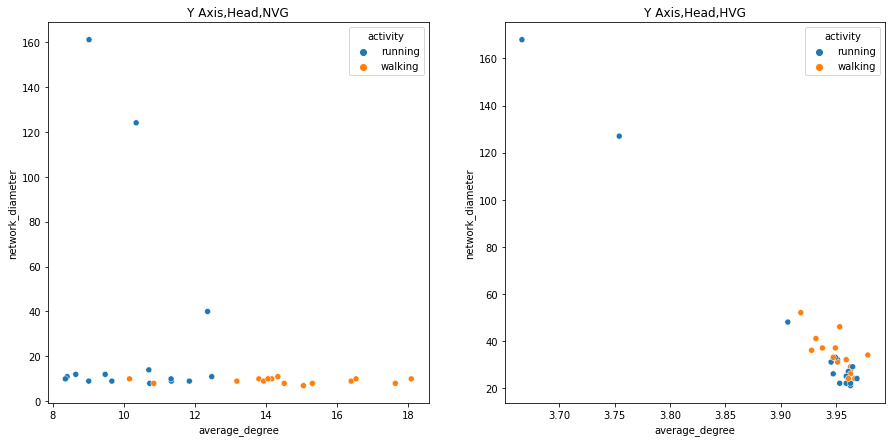

In [ ]:
plt.figure(figsize=(15,7)) # Setting the figure plot size
plt.subplot(1,2,1)         # setting the subplot
sns.scatterplot('average_degree','network_diameter',data=plot_7,hue='activity') # generating the scatterplot
plt.title("Y Axis,Head,NVG") # setting the title
plt.xlabel("average_degree") # setting the xlabel
plt.ylabel("network_diameter")  # setting the y label

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_8,hue='activity') # generating the scatterplot
plt.title("Y Axis,Head,HVG") # setting the title
plt.xlabel("average_degree") # setting the xlabel
plt.ylabel("network_diameter")  # setting the y label

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_9 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['walking','running']))]
plot_10 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['walking','running']))]

Text(0, 0.5, 'network_diameter')

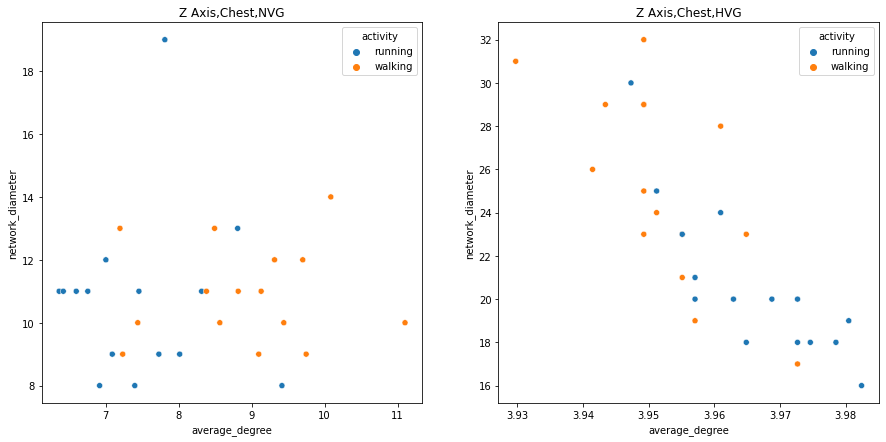

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_9,hue='activity')
plt.title("Z Axis,Chest,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_10,hue='activity')
plt.title("Z Axis,Chest,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_11 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['walking','running']))]
plot_12 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['walking','running']))]

Text(0, 0.5, 'network_diameter')

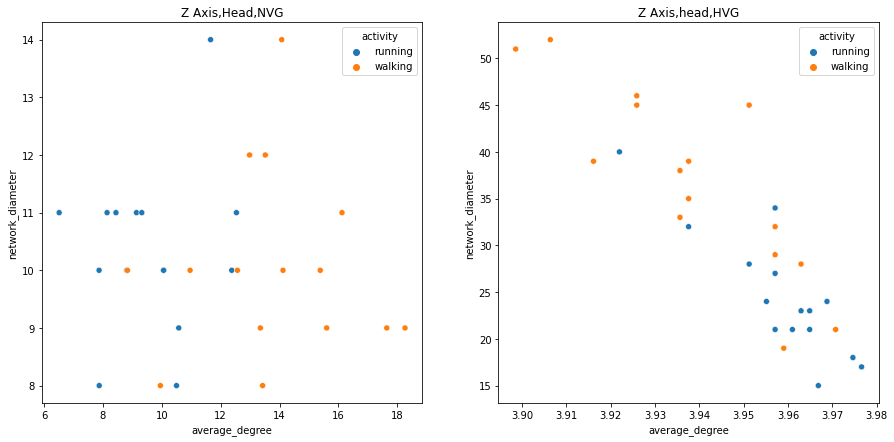

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_11,hue='activity')
plt.title("Z Axis,Head,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_12,hue='activity')
plt.title("Z Axis,head,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

## Climbing up and Climbing Down Plots

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_13 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['climbingdown','climbingup']))]
plot_14 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['climbingdown','climbingup']))]

Text(0, 0.5, 'network_diameter')

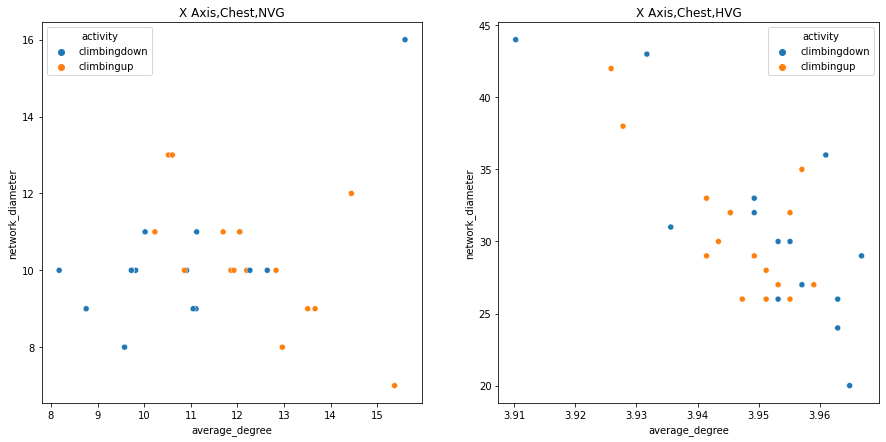

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_13,hue='activity')
plt.title("X Axis,Chest,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_14,hue='activity')
plt.title("X Axis,Chest,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_15 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['climbingdown','climbingup']))]
plot_16 = df_plot[(df_plot['axis']=='attr_x') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['climbingdown','climbingup']))]

Text(0, 0.5, 'network_diameter')

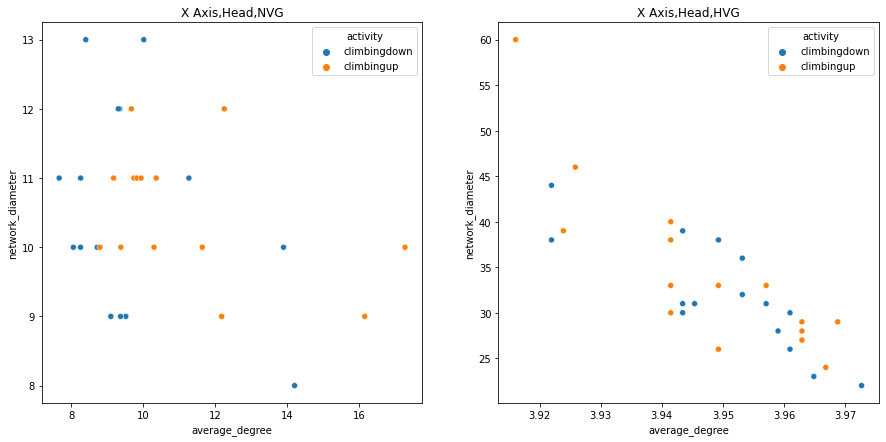

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_15,hue='activity')
plt.title("X Axis,Head,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_16,hue='activity')
plt.title("X Axis,Head,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_17 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['climbingdown','climbingup']))]
plot_18 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['climbingdown','climbingup']))]

Text(0, 0.5, 'network_diameter')

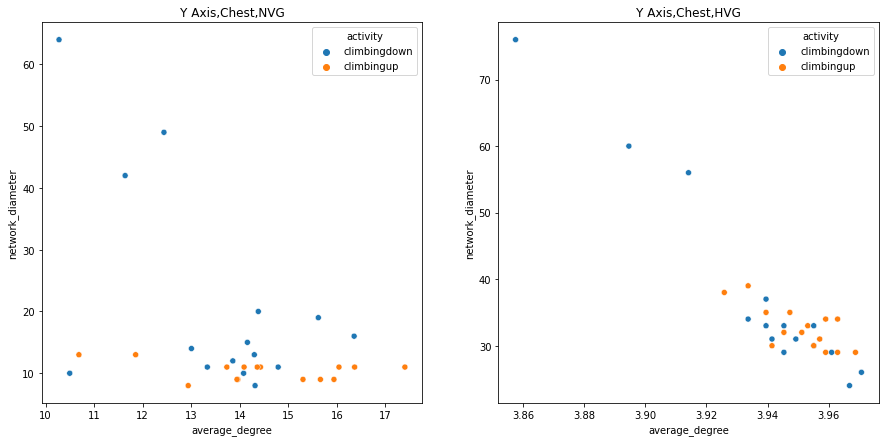

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_17,hue='activity')
plt.title("Y Axis,Chest,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_18,hue='activity')
plt.title("Y Axis,Chest,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_19 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['climbingdown','climbingup']))]
plot_20 = df_plot[(df_plot['axis']=='attr_y') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['climbingdown','climbingup']))]

Text(0, 0.5, 'network_diameter')

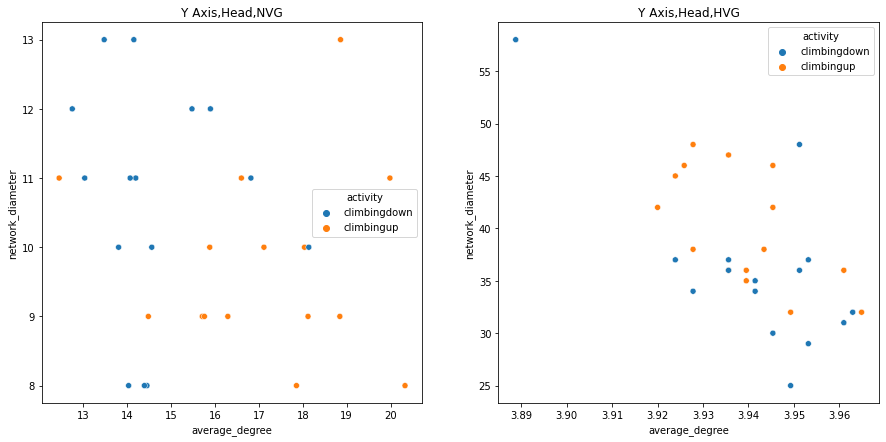

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_19,hue='activity')
plt.title("Y Axis,Head,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_20,hue='activity')
plt.title("Y Axis,Head,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_21 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['climbingdown','climbingup']))]
plot_22 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='chest') & (df_plot['activity'].isin(['climbingdown','climbingup']))]

Text(0, 0.5, 'network_diameter')

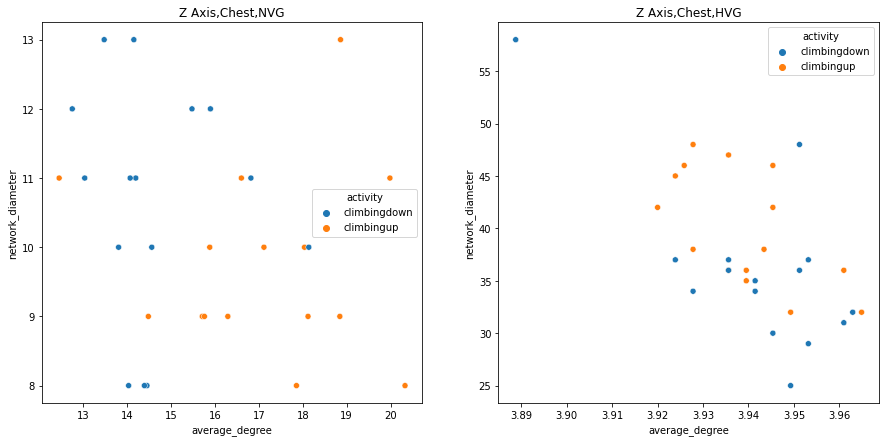

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_19,hue='activity')
plt.title("Z Axis,Chest,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_20,hue='activity')
plt.title("Z Axis,Chest,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

#### Subsetting the dataframe for wach values of axis, method,sensor_loc, activity

In [ ]:
plot_23 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='NVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['climbingdown','climbingup']))]
plot_24 = df_plot[(df_plot['axis']=='attr_z') & (df_plot['Method']=='HVG') & (df_plot['sensor_location']=='head') & (df_plot['activity'].isin(['climbingdown','climbingup']))]

Text(0, 0.5, 'network_diameter')

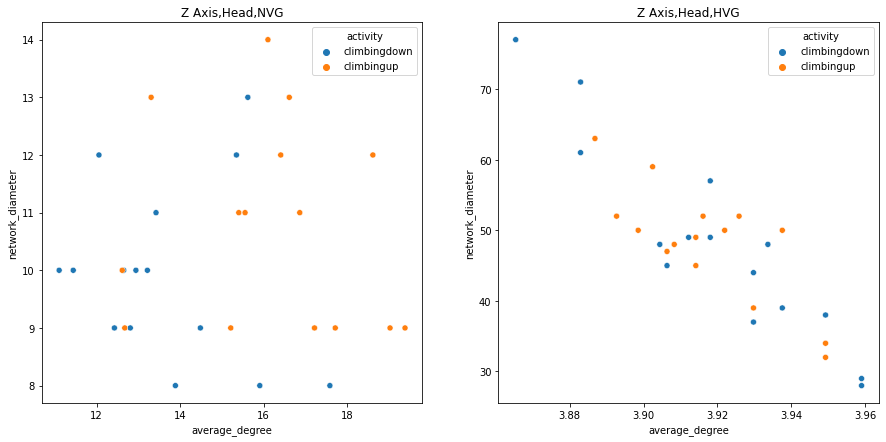

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('average_degree','network_diameter',data=plot_23,hue='activity')
plt.title("Z Axis,Head,NVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

plt.subplot(1,2,2) 
sns.scatterplot('average_degree','network_diameter',data=plot_24,hue='activity')
plt.title("Z Axis,Head,HVG")
plt.xlabel("average_degree")
plt.ylabel("network_diameter")

In [1]:
!jupyter nbconvert -- to html Group_53_Project_2_Task_1

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook Group_53_Project_2_Task_1.ipynb to html
[NbConvertApp] Writing 828036 bytes to Group_53_Project_2_Task_1.html
